In [1]:
using Revise
using Pkg

ENV["PYTHON"] = Sys.which("python")
ENV["PYCALL_JL_RUNTIME_PYTHON"] = Sys.which("python")
Pkg.build("PyCall")
using FileIO
using JLD2
include("../src/DistributionallyRobust.jl")
using .DistributionallyRobust

    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/e32a90da027ca45d84678b826fffd3110bb3fc90/build.log`


    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/62f417f6ad727987c755549e9cd88c46578da562/build.log`


┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /home/kh-ryu/DRC_Project/DRC_Trajectron/Manifest.toml:0


┌ Info: Number of Julia Thread(s): 1
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:39
┌ Info: CUDA Device: NVIDIA GeForce RTX 3060
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:40


┌ Info: Python executable used by PyCall: /home/kh-ryu/anaconda3/envs/trajectron++/bin/python
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:41


In [35]:
include("$(@__DIR__)/../scripts/default_params/params_drc_data_trajectron.jl");

epsilon = 0.1;
prediction_rng_seed = 4;
ego_pos_init_vec = [5., 0.5] .+ [0.263534, 2.0];                             
ego_pos_goal_vec = [5., 8.9] .+ [-10.263534, -5.314636];     

include("$(@__DIR__)/../scripts/parameter_setup_drc.jl");

In [36]:
scene_loader, controller, w_init, measurement_schedule, target_speed =
    controller_setup(scene_param,
                    predictor_param,
                    prediction_device=prediction_device,
                    cost_param=cost_param,
                    cnt_param=cnt_param,
                    dtc=dtc,
                    ego_pos_init_vec=ego_pos_init_vec,
                    ego_pos_goal_vec=ego_pos_goal_vec,
                    sim_horizon=sim_horizon,
                    verbose=true);

Scene Mode: data
Prediction Mode: trajectron
Deterministic Prediction: false
Loaded evaluation data from /home/kh-ryu/DRC_Project/DRC_Trajectron/Trajectron-plus-plus/experiments/processed/eth_test.pkl
Looking at the eth_test.pkl sequence, data_id 0, start_idx 905
Loaded Trajectron model from /home/kh-ryu/DRC_Project/DRC_Trajectron/Trajectron-plus-plus/experiments/pedestrians/models/eth_attention_radius_3/model_registrar-100.pt


In [37]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, ego_pos_goal_vec,
                  measurement_schedule);

┌ Warning: Time 0.10 [sec]: This evaluation iteration took 0.28 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 0.20 [sec]: This evaluation iteration took 0.282 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 0.30 [sec]: This evaluation iteration took 0.278 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 0.40 [sec]: This evaluation iteration took 0.339 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 0.50 [sec]: This evaluation iteration took 0.279 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 0.60 [sec]: This evaluation iteration took 0.288 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 0.70 [sec]: This evaluation iteration took 0.293 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 0.80 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:274
┌ Warning: Time 0.80 [sec]: This evaluation iteration took 0.344 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 0.90 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:274
┌ Warning: Time 0.90 [sec]: This evaluation iteration took 0.287 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 1.00 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:274
┌ Warning: Time 1.00 [sec]: This evaluation iteration took 0.256 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 1.10 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:274
┌ Warning: Time 1.10 [sec]: This evaluation iteration took 0.279 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 1.20 [sec]: This evaluation iteration took 0.339 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 1.30 [sec]: This evaluation iteration took 0.274 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 1.40 [sec]: This evaluation iteration took 0.277 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 1.50 [sec]: This evaluation iteration took 0.289 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 1.60 [sec]: This evaluation iteration took 0.375 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 1.70 [sec]: This evaluation iteration took 0.306 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 1.80 [sec]: This evaluation iteration took 0.305 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 1.90 [sec]: This evaluation iteration took 0.334 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 2.00 [sec]: This evaluation iteration took 0.386 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 2.10 [sec]: This evaluation iteration took 0.316 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 2.20 [sec]: This evaluation iteration took 0.314 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 2.30 [sec]: This evaluation iteration took 0.312 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 2.40 [sec]: This evaluation iteration took 0.379 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 2.50 [sec]: This evaluation iteration took 0.317 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 2.60 [sec]: This evaluation iteration took 0.312 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 2.70 [sec]: This evaluation iteration took 0.336 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 2.80 [sec]: This evaluation iteration took 0.317 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 2.90 [sec]: This evaluation iteration took 0.292 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 3.00 [sec]: This evaluation iteration took 0.281 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 3.10 [sec]: This evaluation iteration took 0.288 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 3.20 [sec]: This evaluation iteration took 0.219 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 3.30 [sec]: This evaluation iteration took 0.185 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 3.40 [sec]: This evaluation iteration took 0.201 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 3.50 [sec]: This evaluation iteration took 0.175 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 3.60 [sec]: This evaluation iteration took 0.457 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 3.70 [sec]: This evaluation iteration took 0.352 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 3.80 [sec]: This evaluation iteration took 0.354 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 3.90 [sec]: This evaluation iteration took 0.357 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 4.00 [sec]: This evaluation iteration took 0.488 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 4.10 [sec]: This evaluation iteration took 0.371 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 4.20 [sec]: This evaluation iteration took 0.39 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 4.30 [sec]: This evaluation iteration took 0.412 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 4.40 [sec]: This evaluation iteration took 0.445 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 4.50 [sec]: This evaluation iteration took 0.39 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 4.60 [sec]: This evaluation iteration took 0.374 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 4.70 [sec]: This evaluation iteration took 0.387 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 4.80 [sec]: This evaluation iteration took 0.451 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 4.90 [sec]: This evaluation iteration took 0.391 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 5.00 [sec]: This evaluation iteration took 0.399 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 5.10 [sec]: This evaluation iteration took 0.369 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 5.20 [sec]: This evaluation iteration took 0.481 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 5.30 [sec]: This evaluation iteration took 0.365 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 5.40 [sec]: This evaluation iteration took 0.392 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 5.50 [sec]: This evaluation iteration took 0.375 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 5.60 [sec]: This evaluation iteration took 0.518 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 5.70 [sec]: This evaluation iteration took 0.412 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 5.80 [sec]: This evaluation iteration took 0.412 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 5.90 [sec]: This evaluation iteration took 0.418 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 6.00 [sec]: This evaluation iteration took 0.499 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 6.10 [sec]: This evaluation iteration took 0.422 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 6.20 [sec]: This evaluation iteration took 0.441 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 6.30 [sec]: This evaluation iteration took 0.439 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 6.40 [sec]: This evaluation iteration took 0.422 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 6.50 [sec]: This evaluation iteration took 0.342 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 6.60 [sec]: This evaluation iteration took 0.353 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 6.70 [sec]: This evaluation iteration took 0.343 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 6.80 [sec]: This evaluation iteration took 0.441 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 6.90 [sec]: This evaluation iteration took 0.33 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 7.00 [sec]: This evaluation iteration took 0.337 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 7.10 [sec]: This evaluation iteration took 0.371 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 7.20 [sec]: This evaluation iteration took 0.418 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 7.30 [sec]: This evaluation iteration took 0.349 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 7.40 [sec]: This evaluation iteration took 0.365 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 7.50 [sec]: This evaluation iteration took 0.33 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 7.60 [sec]: This evaluation iteration took 0.422 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 7.70 [sec]: This evaluation iteration took 0.36 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 7.80 [sec]: This evaluation iteration took 0.329 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 7.90 [sec]: This evaluation iteration took 0.339 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 8.00 [sec]: This evaluation iteration took 0.379 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 8.10 [sec]: This evaluation iteration took 0.327 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 8.20 [sec]: This evaluation iteration took 0.332 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 8.30 [sec]: This evaluation iteration took 0.308 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 8.40 [sec]: This evaluation iteration took 0.379 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 8.50 [sec]: This evaluation iteration took 0.306 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 8.60 [sec]: This evaluation iteration took 0.308 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 8.70 [sec]: This evaluation iteration took 0.311 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 8.80 [sec]: This evaluation iteration took 0.313 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 8.90 [sec]: This evaluation iteration took 0.232 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 9.00 [sec]: This evaluation iteration took 0.248 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 9.10 [sec]: This evaluation iteration took 0.255 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 9.20 [sec]: This evaluation iteration took 0.29 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 9.30 [sec]: This evaluation iteration took 0.262 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 9.40 [sec]: This evaluation iteration took 0.265 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 9.50 [sec]: This evaluation iteration took 0.237 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 9.60 [sec]: This evaluation iteration took 0.307 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 9.70 [sec]: This evaluation iteration took 0.26 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 9.80 [sec]: This evaluation iteration took 0.227 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


┌ Warning: Time 9.90 [sec]: This evaluation iteration took 0.251 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:199


In [38]:
display_log(result.log)

Time 0.00 [sec]: New prediction is available to the controller.
Time 0.00 [sec]: New Distributionally Robust control is scheduled.
Time 0.00 [sec]: New Distributionally Robust control is available to the controller
Time 0.00 [sec]: control: [-1.254151743450149, 0.47259855319262634] is applied to the system.
Time 0.10 [sec]: New Distributionally Robust control is scheduled.
Time 0.10 [sec]: New Distributionally Robust control is available to the controller
Time 0.10 [sec]: control: [-1.3028728874258184, 0.48331651264029796] is applied to the system.
Time 0.20 [sec]: New Distributionally Robust control is scheduled.
Time 0.20 [sec]: New Distributionally Robust control is available to the controller
Time 0.20 [sec]: control: [-1.2508504461006085, 0.6120739627541911] is applied to the system.
Time 0.30 [sec]: New Distributionally Robust control is scheduled.
Time 0.30 [sec]: New Distributionally Robust control is available to the controller
Time 0.30 [sec]: control: [-1.2859704251111728, 0

Time 3.60 [sec]: New Distributionally Robust control is scheduled.
Time 3.60 [sec]: New Distributionally Robust control is available to the controller
Time 3.60 [sec]: control: [0.266396941780474, 1.0397840780297032] is applied to the system.
Time 3.70 [sec]: New Distributionally Robust control is scheduled.
Time 3.70 [sec]: New Distributionally Robust control is available to the controller
Time 3.70 [sec]: control: [0.021584152698665426, 1.185484296297354] is applied to the system.
Time 3.80 [sec]: New Distributionally Robust control is scheduled.
Time 3.80 [sec]: New Distributionally Robust control is available to the controller
Time 3.80 [sec]: control: [0.7961941867066219, 0.8535326828496803] is applied to the system.
Time 3.90 [sec]: New Distributionally Robust control is scheduled.
Time 3.90 [sec]: New Distributionally Robust control is available to the controller
Time 3.90 [sec]: control: [-0.012700418843037995, 0.6601557006653125] is applied to the system.
Time 4.00 [sec]: New 

Time 7.20 [sec]: New Distributionally Robust control is available to the controller
Time 7.20 [sec]: control: [-1.3274664442551452, -0.35009449891339073] is applied to the system.
Time 7.30 [sec]: New Distributionally Robust control is scheduled.
Time 7.30 [sec]: New Distributionally Robust control is available to the controller
Time 7.30 [sec]: control: [-1.4555127330019433, -0.30324058852175645] is applied to the system.
Time 7.40 [sec]: New Distributionally Robust control is scheduled.
Time 7.40 [sec]: New Distributionally Robust control is available to the controller
Time 7.40 [sec]: control: [-1.4121225491342981, -0.3701604430732006] is applied to the system.
Time 7.50 [sec]: New Distributionally Robust control is scheduled.
Time 7.50 [sec]: New Distributionally Robust control is available to the controller
Time 7.50 [sec]: control: [-1.146778008817897, -0.21658155531961762] is applied to the system.
Time 7.60 [sec]: New measurement is obtained.
Time 7.60 [sec]: New prediction is 

In [39]:
result.total_cnt_cost

0.8273054114514123

In [40]:
result.total_pos_cost

236.68305594645545

In [41]:
result.total_col_cost

0.019964327222670573

In [42]:
result.total_col

0

In [43]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

237.53032568512955

In [44]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

1.7702607169223128

Progress:   2%|▊                                        |  ETA: 0:00:57

Progress:   3%|█▎                                       |  ETA: 0:00:53

Progress:   4%|█▋                                       |  ETA: 0:00:52

Progress:   5%|██                                       |  ETA: 0:00:53

Progress:   6%|██▍                                      |  ETA: 0:00:51

Progress:   7%|██▉                                      |  ETA: 0:00:49

Progress:   8%|███▎                                     |  ETA: 0:00:48

Progress:   9%|███▋                                     |  ETA: 0:00:48

Progress:  10%|████                                     |  ETA: 0:00:47

Progress:  11%|████▌                                    |  ETA: 0:00:47

Progress:  12%|████▉                                    |  ETA: 0:00:47

Progress:  13%|█████▎                                   |  ETA: 0:00:46

Progress:  14%|█████▋                                   |  ETA: 0:00:45

Progress:  15%|██████▏                                  |  ETA: 0:00:44

Progress:  16%|██████▌                                  |  ETA: 0:00:43

Progress:  17%|██████▉                                  |  ETA: 0:00:44

Progress:  18%|███████▎                                 |  ETA: 0:00:44

Progress:  19%|███████▊                                 |  ETA: 0:00:43

Progress:  20%|████████▏                                |  ETA: 0:00:43

Progress:  21%|████████▌                                |  ETA: 0:00:43

Progress:  22%|████████▉                                |  ETA: 0:00:42

Progress:  23%|█████████▍                               |  ETA: 0:00:42

Progress:  24%|█████████▊                               |  ETA: 0:00:42

Progress:  25%|██████████▏                              |  ETA: 0:00:42

Progress:  26%|██████████▌                              |  ETA: 0:00:41

Progress:  27%|███████████                              |  ETA: 0:00:40

Progress:  28%|███████████▍                             |  ETA: 0:00:40

Progress:  29%|███████████▊                             |  ETA: 0:00:39

Progress:  30%|████████████▏                            |  ETA: 0:00:39

Progress:  31%|████████████▋                            |  ETA: 0:00:38

Progress:  32%|█████████████                            |  ETA: 0:00:38

Progress:  33%|█████████████▍                           |  ETA: 0:00:36

Progress:  34%|█████████████▊                           |  ETA: 0:00:36

Progress:  35%|██████████████▎                          |  ETA: 0:00:35

Progress:  36%|██████████████▋                          |  ETA: 0:00:34

Progress:  37%|███████████████                          |  ETA: 0:00:34

Progress:  38%|███████████████▍                         |  ETA: 0:00:33

Progress:  39%|███████████████▉                         |  ETA: 0:00:33

Progress:  40%|████████████████▎                        |  ETA: 0:00:33

Progress:  41%|████████████████▋                        |  ETA: 0:00:33

Progress:  42%|█████████████████                        |  ETA: 0:00:32

Progress:  43%|█████████████████▌                       |  ETA: 0:00:32

Progress:  44%|█████████████████▉                       |  ETA: 0:00:32

Progress:  45%|██████████████████▎                      |  ETA: 0:00:31

Progress:  46%|██████████████████▋                      |  ETA: 0:00:31

Progress:  47%|███████████████████▏                     |  ETA: 0:00:31

Progress:  48%|███████████████████▌                     |  ETA: 0:00:30

Progress:  49%|███████████████████▉                     |  ETA: 0:00:30

Progress:  50%|████████████████████▎                    |  ETA: 0:00:29

Progress:  50%|████████████████████▊                    |  ETA: 0:00:29

Progress:  51%|█████████████████████▏                   |  ETA: 0:00:28

Progress:  52%|█████████████████████▌                   |  ETA: 0:00:28

Progress:  53%|█████████████████████▉                   |  ETA: 0:00:28

Progress:  54%|██████████████████████▍                  |  ETA: 0:00:27

Progress:  55%|██████████████████████▊                  |  ETA: 0:00:27

Progress:  56%|███████████████████████▏                 |  ETA: 0:00:26

Progress:  57%|███████████████████████▌                 |  ETA: 0:00:26

Progress:  58%|████████████████████████                 |  ETA: 0:00:25

Progress:  59%|████████████████████████▍                |  ETA: 0:00:25

Progress:  60%|████████████████████████▊                |  ETA: 0:00:24

Progress:  61%|█████████████████████████▏               |  ETA: 0:00:24

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:23

Progress:  63%|██████████████████████████               |  ETA: 0:00:23

Progress:  64%|██████████████████████████▍              |  ETA: 0:00:22

Progress:  65%|██████████████████████████▊              |  ETA: 0:00:22

Progress:  66%|███████████████████████████▎             |  ETA: 0:00:21

Progress:  67%|███████████████████████████▋             |  ETA: 0:00:20

Progress:  68%|████████████████████████████             |  ETA: 0:00:20

Progress:  69%|████████████████████████████▍            |  ETA: 0:00:19

Progress:  70%|████████████████████████████▉            |  ETA: 0:00:19

Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:18

Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:17

Progress:  73%|██████████████████████████████           |  ETA: 0:00:17

Progress:  74%|██████████████████████████████▌          |  ETA: 0:00:16

Progress:  75%|██████████████████████████████▉          |  ETA: 0:00:16

Progress:  76%|███████████████████████████████▎         |  ETA: 0:00:15

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:14

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:14

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:13

Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:13

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:12

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:11

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:11

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:10

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:09

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:09

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:08

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:07

Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:07

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:06

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:06

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:05

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:04

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:04

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:03

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:02

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:02

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:01:00


┌ Info: Saved animation to 
│   fn = /home/kh-ryu/DRC_Project/DRC_Trajectron/notebook/9_data_trajectron_drc.gif
└ @ Plots /home/kh-ryu/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/kh-ryu/DRC_Project/DRC_Trajectron/notebook/9_data_trajectron_drc.gif")
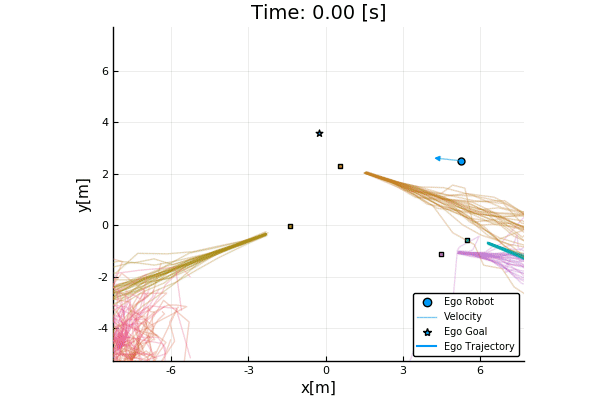

In [45]:
make_gif(result, dtplot=0.1, fps=5, xlim=(-3. + -5.263534, 13. + -5.314636), 
         ylim=(0. + -5.263534, 10. + -2.314636), figsize=(600, 400), 
         legendfontsize=7, legend=:bottomright, markersize=5., filename="9_data_trajectron_drc.gif")